In [27]:
from google.colab import drive
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split
import random

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
data_dir = '/content/drive/My Drive/img'

image_list = []


files = os.listdir(data_dir)

for file in files:
        # Check if the file is a regular file (not a directory)
        if os.path.isfile(os.path.join(data_dir, file)):
            # Add the file name to the list
            image_list.append(str(file))

random.shuffle(image_list)

labels = []
images = []
target_size =(257,257)

for image_file in image_list:
  labels.append(image_file[-5])
  image = Image.open(os.path.join(data_dir, image_file))
  image = image.resize(target_size)
  image_array = np.array(image)
  images.append(image_array)

In [17]:
print(labels)
len(labels)

['1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0',

260

In [45]:
# Convert the list of strings to a list of integers
labels = [int(num) for num in labels]

labels = np.array(labels)

images = np.array(images)
images.shape

(260, 257, 257, 3)

In [46]:

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

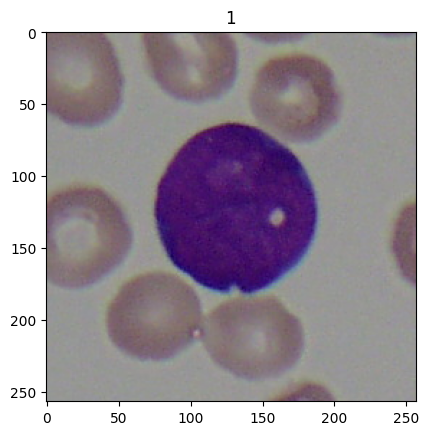

In [47]:
train_labels
len(train_labels)
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.title(train_labels[0])
plt.show()

In [60]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 model without the top classification layers
 ## non vengono inclusi i layer di classificazione, quindi sono i layer on top
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(257, 257, 3))
base_model.trainable=False

num_layers = len(base_model.layers)
num_layers
num_layer_fine_tune=1

for model_layer in base_model.layers[:num_layers - num_layer_fine_tune]:
    print(f"FREEZING LAYER: {model_layer}")
    model_layer.trainable = False

print("\n")
print(f"Configured to fine tune the last", num_layer_fine_tune, "convolutional layers...")
print("\n")

#print(base_model.summary())

FREEZING LAYER: <keras.src.engine.input_layer.InputLayer object at 0x7a8edc25e6e0>
FREEZING LAYER: <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7a8dee17f550>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a8e1803af20>
FREEZING LAYER: <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7a8e6d3df550>
FREEZING LAYER: <keras.src.layers.core.activation.Activation object at 0x7a8ee8b49f30>
FREEZING LAYER: <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7a8ee8a9e800>
FREEZING LAYER: <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a8dee1c5750>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a8dee1c53f0>
FREEZING LAYER: <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7a8dee1c7580>
FREEZING LAYER: <keras.src.layers.core.activation.Activation object at 0x7a8dee1c73d0>
FREEZING LAYER: <keras.src.layers.convolutional.

In [61]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input,  GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf

input_shape=(257, 257, 3)
inputs = tf.keras.Input(shape=input_shape)
x = preprocess_input(inputs)

x = base_model(x)

xx= GlobalAveragePooling2D()(x)

#The final layer
outputs = Dense(1, activation='sigmoid')(xx)

# The final model.
model_ResNet50_finetune = Model(inputs, outputs)

#print(model_ResNet50_finetune.summary())

In [62]:
model_ResNet50_finetune.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss="binary_crossentropy",
                    metrics=['accuracy'],
                   )

In [63]:
training_results = model_ResNet50_finetune.fit(train_images,
                                               train_labels,
                                              epochs=100,
                                                validation_split=0.2,
                                               batch_size=16,

                                           )

Epoch 1/100
11/11 [==============================] - 8s 458ms/step - loss: 0.6419 - accuracy: 0.6687 - val_loss: 0.6052 - val_accuracy: 0.6429
Epoch 2/100
11/11 [==============================] - 1s 103ms/step - loss: 0.6180 - accuracy: 0.6928 - val_loss: 0.5804 - val_accuracy: 0.7857
Epoch 3/100
11/11 [==============================] - 1s 104ms/step - loss: 0.6038 - accuracy: 0.7108 - val_loss: 0.5607 - val_accuracy: 0.8095
Epoch 4/100
11/11 [==============================] - 1s 103ms/step - loss: 0.5863 - accuracy: 0.7410 - val_loss: 0.5641 - val_accuracy: 0.7143
Epoch 5/100
11/11 [==============================] - 1s 91ms/step - loss: 0.5752 - accuracy: 0.7410 - val_loss: 0.5637 - val_accuracy: 0.6667
Epoch 6/100
11/11 [==============================] - 1s 90ms/step - loss: 0.5635 - accuracy: 0.7410 - val_loss: 0.5479 - val_accuracy: 0.7381
Epoch 7/100
11/11 [==============================] - 1s 102ms/step - loss: 0.5486 - accuracy: 0.7952 - val_loss: 0.5200 - val_accuracy: 0.7857
E

In [64]:
loss, accuracy = model_ResNet50_finetune.evaluate(test_images, test_labels)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

2/2 [==============================] - 0s 106ms/step - loss: 0.2334 - accuracy: 0.9423
Test Loss: 0.2334
Test Accuracy: 0.9423
